In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

a=np.array([5,2,7]) 
X = np.array([1,2,3]) + np.array([2,1,2]) * np.random.rand(100 , 3) 
y = 4 + X.dot(a.T)[:, np.newaxis] + np.random.randn(100, 1)
y = [row[0] for row in y]
df = []

### Tikhonov Closed Form

\begin{equation}
∃β. \ \ \ (y−X\beta)^T(y−X \beta)+λ\beta^T\beta=0
\end{equation}
<br>
\begin{equation}
∃β. \ \ \ (X^TX+\lambda I)=X^Ty
\end{equation}

In [2]:
class Tikhonov_closed():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        dim  = X.shape[1]
        A = np.identity(dim)
        A[0, 0] = 0
        A_biased = self.alpha * A
        thetas = np.linalg.inv(X.T @ X + A_biased) @ X.T @ y
        self.thetas = thetas
        return self
    
    def predict(self, X):
        return X.dot(self.thetas)

In [3]:
def plot_alphas(df,X,y, alphas=[1, 100, 1000], show_degree=1):
  
    fig, (ax, ax1, ax2) = plt.subplots(1, len(alphas), figsize=(20,5))
    for alpha_, ax_ in zip(alphas, [ax, ax1, ax2]):
        model = Tikhonov_closed(alpha=alpha_)
        model.fit(X,y)

        predictions = model.predict(X)
        ax_.scatter(X[:, 0], y, color='black')
        ax_.plot(X[:, 0], model.predict(X))
        ax_.set_title(f'Alpha = {alpha_}')
        ax_.set_ylabel('y')
        
        fig.suptitle('Ridge Regression model fits for different tuning parameters alpha')
        print("Coef for alpha ="+str(alpha_)+" = "+str(model.thetas))
        row = ["Closed Form Ridge",alpha_,str(model.thetas)]
        df.append(row)
    fig.show()
    return fig

Coef for alpha =1 = [5.42436588 2.98767523 7.13394838]
Coef for alpha =100 = [10.71163835  2.2489086   4.61267745]
Coef for alpha =1000 = [18.75443232  0.56623787  1.13563303]


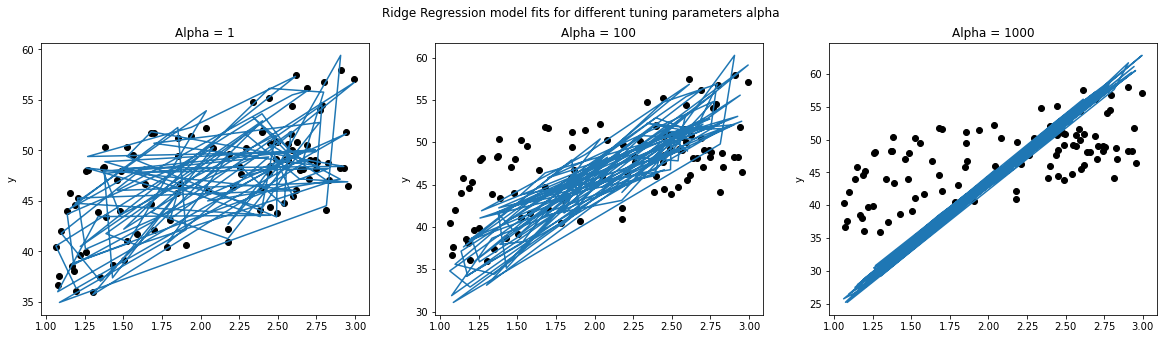

In [4]:
fig_alphas = plot_alphas(df, X, y, show_degree=1)

## Tikhonov from Sklearn

Coef for alpha =1 = [5.12301528 2.00571789 6.59820954]
Coef for alpha =100 = [1.3938664  0.15928899 1.58197579]
Coef for alpha =1000 = [0.18211019 0.01686844 0.20066496]


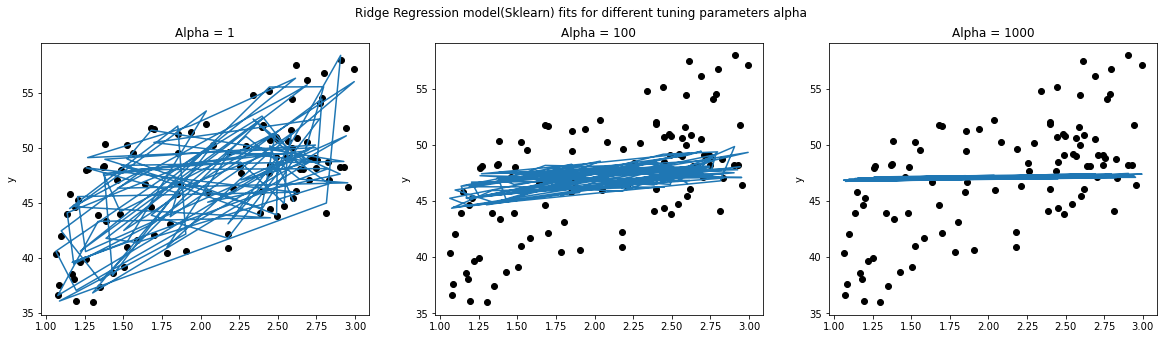

In [5]:
from sklearn.linear_model import Ridge
def plot_alphas(X,y, alphas=[1, 100, 1000], show_degree=1):
  
    fig, (ax, ax1, ax2) = plt.subplots(1, len(alphas), figsize=(20,5))
    for alpha_, ax_ in zip(alphas, [ax, ax1, ax2]):
        model = Ridge(alpha=alpha_)
        model.fit(X,y)

        predictions = model.predict(X)
        ax_.scatter(X[:, 0], y, color='black')
        ax_.plot(X[:, 0], model.predict(X))
        ax_.set_title(f'Alpha = {alpha_}')
        ax_.set_ylabel('y')
        
        fig.suptitle('Ridge Regression model(Sklearn) fits for different tuning parameters alpha')
        print("Coef for alpha ="+str(alpha_)+" = "+str(model.coef_))
        row = ["Sklearn Ridge", alpha_, str(model.coef_)]
        df.append(row)
    fig.show()
    return fig

fig_alphas = plot_alphas(X, y, show_degree=1)

## Comparasion the Outputs of Sklearn Solution with Tikhonov Closed Form

Both of these forms, weights are tending to 0 with increasing number of alphas. Therefore output will become a line in high number of apha. However, while bias term in my approach increases, it decreases in built-in function.

Possibilities

<b>Normalization/interception haven't used in our case  <br>
Ridge regression might have optimization/smoothing approaches in itself <br>
<b>Rigde solver uses SVD and gradient descent approaches

## Tikhonov With Gradient Descent

\begin{equation}
L(w,b). \ \ \ \sum_{i=1}^n(y^{(i)}-(w.x^{(i)}+b))^2 + \lambda||w||^2
\end{equation}

Gradient Descent

\begin{equation}
w_0 = 0 t=0 
\end{equation}

\begin{equation}
while \ \ \triangledown L(w_t) \not\approx 0:
\end{equation}
\begin{equation}
w_{(t+1)} = w_t - n_t\triangledown L(w_t)
\end{equation}
\begin{equation}
t=t+1
\end{equation}

\begin{equation}
\triangledown L(w) = -2 \sum (y^{(i)}-(w.x^{(i)}))x^{(i)}+2 \lambda w
\end{equation}

Interception is used for X and Y to avoid dimension problems (for mul operator and dot product)

In [6]:
class RidgeRegression_w_GDesc() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

Coef for alpha =1 = [5.14951918 2.19895987 6.69509585]
Coef for alpha =100 = [1.39426415 0.15991817 1.5827906 ]
Coef for alpha =1000 = [0.18211019 0.01686844 0.20066496]


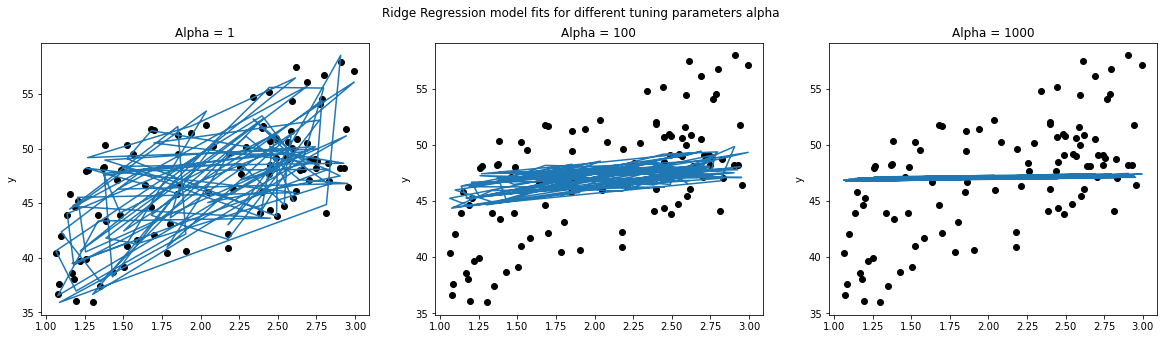

In [7]:
def plot_alphas(X,y, alphas=[1, 100, 1000], show_degree=1):
  
    fig, (ax, ax1, ax2) = plt.subplots(1, len(alphas), figsize=(20,5))
    for alpha_, ax_ in zip(alphas, [ax, ax1, ax2]):
        model = RidgeRegression_w_GDesc( iterations = 5000,                             
                        learning_rate = 0.02, l2_penality = alpha_)
        model.fit(X,y)

        predictions = model.predict(X)
        ax_.scatter(X[:, 0], y, color='black')
        ax_.plot(X[:, 0], model.predict(X))
        ax_.set_title(f'Alpha = {alpha_}')
        ax_.set_ylabel('y')
        
        fig.suptitle('Ridge Regression model fits for different tuning parameters alpha')
        print("Coef for alpha ="+str(alpha_)+" = "+str(model.W))
        row = ["Full GD", alpha_, str(model.W)]
        df.append(row)    
    fig.show()
    return fig
fig_alphas = plot_alphas(X, y, show_degree=1)

### Stochastic Gradient Descent

\begin{equation}
\theta_j := \omega_j-\alpha(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}
\end{equation}

In [8]:
class RidgeRegression_w_SGD() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
      
    def update_weights( self ) :    
        m = X.shape[1]
        for  i in range(m):
            random_index= np.random.randint(m)
            self.xi = X[random_index:random_index+1]
            self.Y_pred = self.predict( self.xi )
            self.yi = y[random_index:random_index+1]
            
            dW = ( - ( 2 * ( self.xi.T ).dot( self.yi - self.Y_pred ) ) +               
                   ( 2 * self.l2_penality * self.W ) ) / self.m     
            db = - 2 * np.sum( self.yi - self.Y_pred ) / self.m             
          
        # update weights    
            self.W = self.W - self.learning_rate * dW    
            self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

Coef for alpha =1 = [2.9604976  2.91528893 5.60176561]
Coef for alpha =100 = [0.00716998 0.007869   0.01812719]
Coef for alpha =1000 = [-0.00202103 -0.00204805 -0.0037042 ]


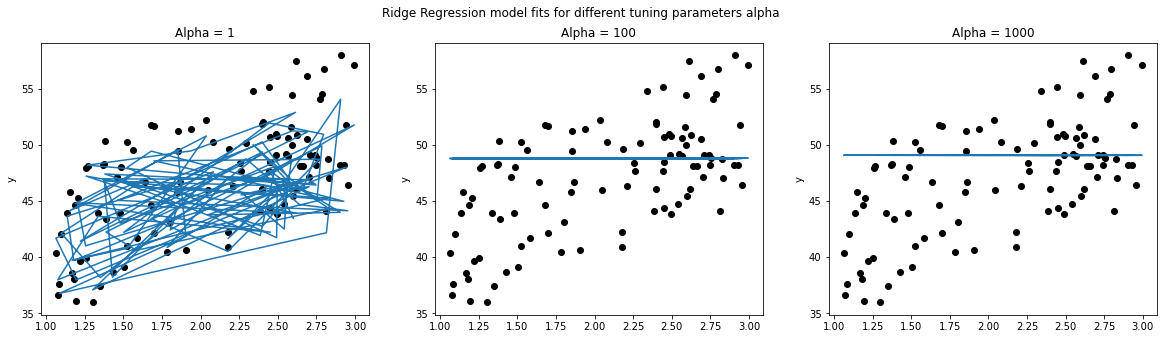

In [9]:
def plot_alphas(X,y, alphas=[1, 100, 1000], show_degree=1):
  
    fig, (ax, ax1, ax2) = plt.subplots(1, len(alphas), figsize=(20,5))
    for alpha_, ax_ in zip(alphas, [ax, ax1, ax2]):
        model = RidgeRegression_w_SGD( iterations = 5000,                             
                        learning_rate = 0.02, l2_penality = alpha_)
        model.fit(X,y)

        predictions = model.predict(X)
        ax_.scatter(X[:, 0], y, color='black')
        ax_.plot(X[:, 0], model.predict(X))
        ax_.set_title(f'Alpha = {alpha_}')
        ax_.set_ylabel('y')
        
        fig.suptitle('Ridge Regression model fits for different tuning parameters alpha')
        print("Coef for alpha ="+str(alpha_)+" = "+str(model.W))
        row = ["Stochastic GD", alpha_, str(model.W)]
        df.append(row)
    fig.show()
    return fig
fig_alphas = plot_alphas(X, y, show_degree=1)

### Mini-batch Gradient Descent

\begin{equation}
\theta_j := \theta_j-\alpha \ 1\setminus batchsize \sum _{k=i} ^{i+batchsize-1} (h_{\theta}(x^{(k)})-y^{(k)})x_{j}^{(k)}
\end{equation}

In [10]:
class RidgeRegression_w_MiniBatch() :
      
    def __init__( self, learning_rate, iterations, l2_penality, batch_size ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
        self.batch_size = batch_size
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    def create_mini_batches(X, y, batch_size):
        mini_batches = []
        data = np.hstack((X, y))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size
        i = 0

        for i in range(n_minibatches + 1):
            mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :-1]
            Y_mini = mini_batch[:, -1].reshape((-1, 1))
            mini_batches.append((X_mini, Y_mini))
        return mini_batches   
    
    def update_weights( self ) :    
        mini_batches = create_mini_batches(X, y, batch_size) 
        
        for mini_batch in mini_batches:
            self.X_mini, self.y_mini = mini_batch
            self.Y_pred = self.predict( self.X_mini )
            
            dW = ( - ( 2 * ( self.X_mini.T ).dot( self.y_mini - self.Y_pred ) ) +               
                   ( 2 * self.l2_penality * self.W ) ) / self.m     
            db = - 2 * np.sum( self.y_mini - self.Y_pred ) / self.m             

    # update weights    
            self.W = self.W - self.learning_rate * dW    
            self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

Coef for alpha =1 = [2.96828931 2.9169421  5.6008355 ]
Coef for alpha =100 = [0.00804923 0.01041143 0.02341622]
Coef for alpha =1000 = [-0.00128203 -0.0007937  -0.00122216]


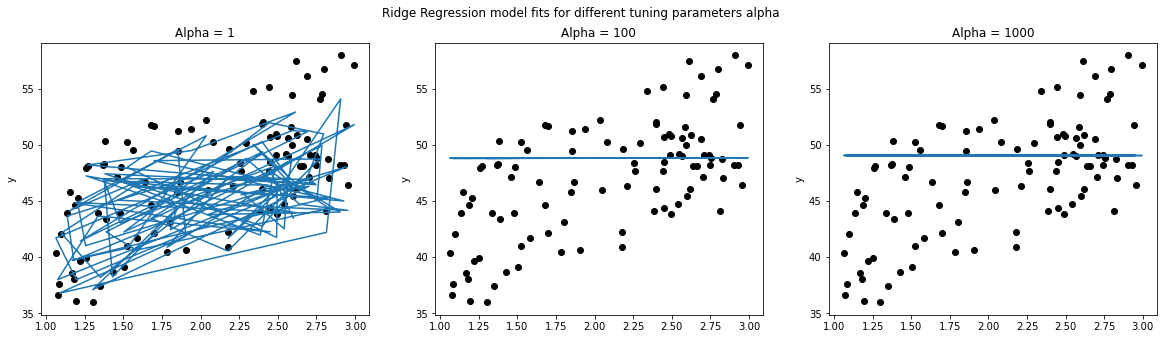

In [11]:
def plot_alphas(X,y, alphas=[1, 100, 1000], show_degree=1):
  
    fig, (ax, ax1, ax2) = plt.subplots(1, len(alphas), figsize=(20,5))
    for alpha_, ax_ in zip(alphas, [ax, ax1, ax2]):
        model = RidgeRegression_w_SGD( iterations = 5000,                             
                        learning_rate = 0.02, l2_penality = alpha_)
        model.fit(X,y)

        predictions = model.predict(X)
        ax_.scatter(X[:, 0], y, color='black')
        ax_.plot(X[:, 0], model.predict(X))
        ax_.set_title(f'Alpha = {alpha_}')
        ax_.set_ylabel('y')
        
        fig.suptitle('Ridge Regression model fits for different tuning parameters alpha')
        print("Coef for alpha ="+str(alpha_)+" = "+str(model.W))

        row = ["Mini-Batch GD", alpha_, str(model.W)]
        df.append(row)
    fig.show()
    return fig
fig_alphas = plot_alphas(X, y, show_degree=1)

In [12]:
df
dataframe = pd.DataFrame (df,columns=['Algorithm','Alpha','Coefficent'])
pd.set_option('display.max_colwidth', None)


In [13]:
dataframe

,Algorithm,Alpha,Coefficent
0,Closed Form Ridge,1,[5.42436588 2.98767523 7.13394838]
1,Closed Form Ridge,100,[10.71163835 2.2489086 4.61267745]
2,Closed Form Ridge,1000,[18.75443232 0.56623787 1.13563303]
3,Sklearn Ridge,1,[5.12301528 2.00571789 6.59820954]
4,Sklearn Ridge,100,[1.3938664 0.15928899 1.58197579]
5,Sklearn Ridge,1000,[0.18211019 0.01686844 0.20066496]
6,Full GD,1,[5.14951918 2.19895987 6.69509585]
7,Full GD,100,[1.39426415 0.15991817 1.5827906 ]
8,Full GD,1000,[0.18211019 0.01686844 0.20066496]
9,Stochastic GD,1,[2.9604976 2.91528893 5.60176561]


### Conclusion

With increase number of alphas, coefficent tend to decrease because all points will be penelized high number of alpha therefore effects of points will be converged to 0.

Tikhonov with FGD gives same result with built-in sklearn function